In [1]:
import pandas as pd
import numpy as np
from os import getcwd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from ast import literal_eval
from user_agents import parse
from collections import Counter

### Set the path and import data

In [2]:
CURR_PATH = getcwd()
# # The above command will give us the current working directory.
PATH_DATA = CURR_PATH + "/data/new/"

# accounts_data = pd.read_csv(PATH_DATA + "instagram_accounts.csv",converters={'id_followers': literal_eval, 'department': literal_eval})
# posts_data = pd.read_csv(PATH_DATA + "instagram_posts.csv")

In [3]:
accounts_data = pd.read_csv(PATH_DATA + "instagram_accounts.csv", converters={'id_followers': literal_eval, 'department': literal_eval})
posts_data = pd.read_csv(PATH_DATA + "instagram_posts.csv")
posts_data1 = posts_data.head(1193)
posts_data_2 = posts_data[1194:]

### First Visualiation of the data

In [4]:
print(accounts_data.head())

   Unnamed: 0  id_user  nb_followers  nb_following  nb_posts     sex  \
0           0   288877           167           161        48  female   
1           1   140311            67           150         8  female   
2           2   182096           142           161        14  female   
3           3   208875           249           164       150    male   
4           4   960092            95           162        19  female   

                                        id_followers  \
0  [738818, 134147, 314454, 977416, 926730, 82740...   
1  [380289, 341188, 775558, 998151, 246792, 17869...   
2  [524806, 968200, 241324, 233490, 188948, 15054...   
3  [776192, 164353, 989698, 134147, 305670, 65792...   
4  [858624, 896013, 138779, 817185, 854563, 88580...   

                   department                   email  \
0  (64, Pyrénées-Atlantiques)  zacharieweber@live.com   
1                (03, Allier)   hugues65@fontaine.com   
2                  (27, Eure)       gilles11@live.com   
3 

### Sex Data

In [5]:
accounts_data['sex'].value_counts()

female    1550
male      1495
Name: sex, dtype: int64

### Department Data

In [6]:
dt = accounts_data['department'].value_counts().sort_values(ascending=False).to_frame()
dt.reset_index(level=0, inplace=True)
dt.rename({'department':'count', 'index':'department'}, axis='columns', inplace=True)
#print(dt)
#print(dt.values[0,0][0])

import csv

# todo we need here to change the encoding.

with open('Department_data.csv', 'w', encoding='UTF-8', newline='') as f:
    writer = csv.writer(f)
    header = ['Department_Code', 'Department_Name', 'Number_of_Individuals']

    # write the header
    writer.writerow(header)

    ls =[]
    for i in range(len(dt)):
        ls.append([dt.values[i,0][0]])
        # write the data

        writer.writerow([dt.values[i,0][0], dt.values[i,0][1], dt.values[i,1]])

# close the file
f.close()


### Number of followers!

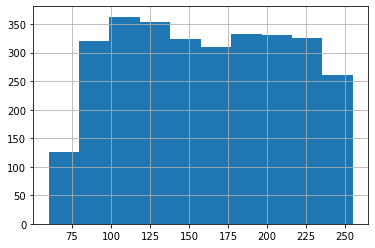

count    3045.000000
mean      160.211166
std        51.991272
min        60.000000
25%       115.000000
50%       159.000000
75%       205.000000
max       255.000000
Name: nb_followers, dtype: float64

In [7]:
dt_2 = accounts_data['nb_followers'].to_frame()
#print(dt_2)
#print(dt_2.values[0,0])

with open('number_of_followers.csv', 'w', encoding='UTF-8', newline='') as f:
    writer = csv.writer(f)
    header = ['Number of Followers']

    # write the header
    writer.writerow(header)

    ls =[]
    for i in range(len(dt)):
        ls.append([dt_2.values[i,0]])
        # write the data

        writer.writerow([dt_2.values[i,0]])

# close the file
f.close()


accounts_data["nb_followers"].hist()
plt.show()
accounts_data["nb_followers"].describe()

### Number of following!

      nb_following
0              161
1              150
2              161
3              164
4              162
...            ...
3040           164
3041           176
3042           164
3043           165
3044           170

[3045 rows x 1 columns]


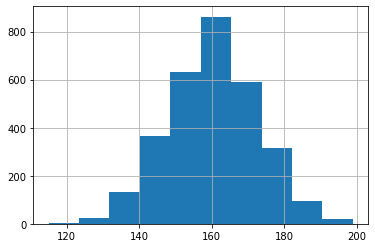

count    3045.000000
mean      160.211166
std        12.330283
min       115.000000
25%       152.000000
50%       160.000000
75%       169.000000
max       199.000000
Name: nb_following, dtype: float64

In [8]:
dt_3 = accounts_data['nb_following'].to_frame()
print(dt_3)
#print(dt_3.values[0,0])

with open('number_of_following.csv', 'w', encoding='UTF-8', newline='') as f:
    writer = csv.writer(f)
    header = ['Number of Following']

    # write the header
    writer.writerow(header)

    ls =[]
    for i in range(len(dt_3)):
        ls.append([dt_3.values[i,0]])
        # write the data

        writer.writerow([dt_3.values[i,0]])

# close the file
f.close()


accounts_data["nb_following"].hist()
plt.show()
accounts_data["nb_following"].describe()

### Number of Posts!

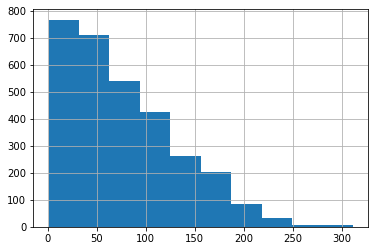

count    3045.000000
mean       76.764532
std        56.230169
min         1.000000
25%        31.000000
50%        65.000000
75%       112.000000
max       311.000000
Name: nb_posts, dtype: float64

In [9]:
dt_4 = accounts_data['nb_posts'].to_frame()
#print(dt_4)
#print(dt_4.values[0,0])

with open('numbera_of_posts.csv', 'w', encoding='UTF-8', newline='') as f:
    writer = csv.writer(f)
    header = ['Number of Posts']

    # write the header
    writer.writerow(header)

    ls =[]
    for i in range(len(dt)):
        ls.append([dt_4.values[i,0]])
        # write the data

        writer.writerow([dt_4.values[i,0]])

# close the file
f.close()


accounts_data["nb_posts"].hist()
plt.show()
accounts_data["nb_posts"].describe()

### Age of the users!

In [10]:
age = accounts_data["birth_date"].to_frame()
#print(age)
n_age = age.values[27, 0]
#print(int(n_age[-2:len(n_age)]))
#print(type(n_age[-2:len(n_age)]))

with open('age_of_users.csv', 'w', encoding='UTF-8', newline='') as f:
    writer = csv.writer(f)
    header = ['Age of users!']

    # write the header
    writer.writerow(header)

    for i in range(len(dt)):
        # write the data
            if int(age.values[i,0][-2:len(n_age)]) > 22:
                a = 100 - int(age.values[i,0][-2:len(n_age)]) + 22
                writer.writerow([str(a)])
            else:
                a = -int(age.values[i,0][-2:len(n_age)]) + 22
                writer.writerow([str(a)])

# close the file
f.close()

### PC, Mobile phone, Tablet or bot?

In [11]:
dt_6 = accounts_data['user_agent'].to_frame()
# print(dt_6.values[100,0])

mobile = 0
tablet = 0
pc = 0
bot = 0

ls_1 = []
for i in range(len(dt_6)):
    
    # a = dt_6.values[i,0].split(';', 1)[0].split('(')
    # ls_1.append(a[1])
    ua_string = dt_6.values[i,0]
    user_agent = parse(ua_string)
    
    if user_agent.is_mobile:
        mobile += 1
    elif user_agent.is_tablet:
        tablet += 1
    elif user_agent.is_pc:
        pc += 1
    elif user_agent.is_bot:
        bot += 1

print('Mobile: ' + str(mobile))
print('Tablet: ' + str(tablet))
print('PC: ' + str(pc))
print('Bot: ' + str(bot))

#print(user_agent.is_touch_capable) # returns False or True

Mobile: 732
Tablet: 88
PC: 1989
Bot: 0


### Browsers!

In [12]:
dt_7 = accounts_data['user_agent'].to_frame()

ls_3 =[]
for i in range(len(dt_7)):
    
    ua_string = dt_7.values[i,0]
    user_agent = parse(ua_string)

    ls_3.append(user_agent.browser.family)

# print(ls_3)
occurrences = Counter(ls_3) # <-- This will give us the number of users of the different browsers. 
print(occurrences) 

Counter({'Opera': 595, 'IE': 591, 'Chrome': 504, 'Safari': 408, 'Firefox': 346, 'Mobile Safari': 209, 'Firefox Mobile': 136, 'Firefox iOS': 135, 'Chrome Mobile iOS': 121})


### Just Documentation and examples for user_agents and parse.

In [13]:
# (https://pythonrepo.com/repo/selwin-python-user-agents-python-text-processing#:~:text=user_agents%20is%20a%20Python%20library,%2FHTTP)%20user%20agent%20strings.)

#from user_agents import parse

# Let's start from an old, non touch Blackberry device
#ua_string = 'BlackBerry9700/5.0.0.862 Profile/MIDP-2.1 Configuration/CLDC-1.1 VendorID/331 UNTRUSTED/1.0 3gpp-gba'
#user_agent = parse(ua_string)
#print(user_agent.is_mobile) # returns True
#print(user_agent.is_tablet) # returns False
#print(user_agent.is_touch_capable) # returns False
#print(user_agent.is_pc) # returns False
#print(user_agent.is_bot) # returns False
#str(user_agent) # returns "BlackBerry 9700 / BlackBerry OS 5 / BlackBerry 9700"

# Accessing user agent's browser attributes
#user_agent.browser  # returns Browser(family=u'Mobile Safari', version=(5, 1), version_string='5.1')
#user_agent.browser.family  # returns 'Mobile Safari'
#user_agent.browser.version  # returns (5, 1)
#user_agent.browser.version_string   # returns '5.1'